# Exploratory Data Analysis

# 0. Load Data

In [1]:
# Enter the file path to your dataset here
file_path = '/Users/max/Desktop/MachineLearning_Group_T/Machine_Learning_HeartDiseaseDetection/data/cardiovascular_risk_dataset.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Patient_ID,age,bmi,systolic_bp,diastolic_bp,cholesterol_mg_dl,resting_heart_rate,smoking_status,daily_steps,stress_level,physical_activity_hours_per_week,sleep_hours,family_history_heart_disease,diet_quality_score,alcohol_units_per_week,heart_disease_risk_score,risk_category
0,1,62,25.0,142,93,247,72,Never,11565,3,5.6,8.2,No,7,0.7,28.1,Medium
1,2,54,29.7,158,101,254,74,Current,4036,8,0.5,6.7,No,5,4.5,63.0,High
2,3,46,36.2,170,113,276,80,Current,3043,9,0.4,4.0,No,1,20.8,73.1,High
3,4,48,30.4,153,98,230,73,Former,5604,5,0.6,8.0,No,4,8.5,39.5,Medium
4,5,46,25.3,139,87,206,69,Current,7464,1,2.0,6.1,No,5,3.6,29.3,Medium


# 1. Data Overview

In [3]:
# Get an overview of the dataset

def dataoverview(df, message = "Data Overview"):
    print(f"{message}\n")
    print("\nNumber of rows: ", df.shape[0])
    print("\n Number of columns: ", df.shape[1])
    print("\nColumns: ", df.columns.tolist())
    print("\nMissing values: ", df.isnull().sum().values.sum())    
    print("\nUnique values: \n", df.nunique())
    print("\nData Types: \n", df.dtypes)

dataoverview(df)

Data Overview


Number of rows:  5500

 Number of columns:  17

Columns:  ['Patient_ID', 'age', 'bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_mg_dl', 'resting_heart_rate', 'smoking_status', 'daily_steps', 'stress_level', 'physical_activity_hours_per_week', 'sleep_hours', 'family_history_heart_disease', 'diet_quality_score', 'alcohol_units_per_week', 'heart_disease_risk_score', 'risk_category']

Missing values:  0

Unique values: 
 Patient_ID                          5500
age                                   73
bmi                                  232
systolic_bp                           82
diastolic_bp                          55
cholesterol_mg_dl                    166
resting_heart_rate                    41
smoking_status                         3
daily_steps                         4211
stress_level                          10
physical_activity_hours_per_week     123
sleep_hours                           61
family_history_heart_disease           2
diet_quality_score         

**Findings**:  
- There are 17 columns with 5500 rows.
- 5500 unique Patient IDs, so no duplicates
- Data types fit the columns, no further cleaning required

## 1.1 Target Variable Analysis

In [4]:
# Define the target variable
target_column = 'risk_category' 

# Describe the target variable
print(f"Target Variable: {target_column}\n")
print(df[target_column].describe())
print("\nValue Counts:\n", df[target_column].value_counts())

Target Variable: risk_category

count       5500
unique         3
top       Medium
freq        2244
Name: risk_category, dtype: object

Value Counts:
 risk_category
Medium    2244
Low       1838
High      1418
Name: count, dtype: int64


risk_category
Medium    2244
Low       1838
High      1418
Name: count, dtype: int64


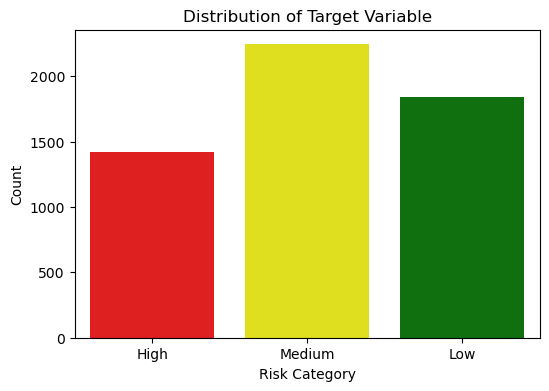

In [5]:
# Distribution of target
print(df[target_column].value_counts())

# Visualization
risk_colors = ['yellow', 'red', 'green']
plt.figure(figsize=(6,4))
sns.countplot(x=target_column, data=df, hue=target_column, palette=risk_colors, order=['High', 'Medium', 'Low'])
plt.title('Distribution of Target Variable')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()

In [6]:
# Risk score to Risk categories
df_group_risk = df.groupby('heart_disease_risk_score')['risk_category'].first().reset_index()

# Range low risk
print("Low risk from: ", df_group_risk[df_group_risk['risk_category'] == 'Low']['heart_disease_risk_score'].max())

# Range medium risk
print("Medium risk up to: ", df_group_risk[df_group_risk['risk_category'] == 'Medium']['heart_disease_risk_score'].max())

#Range high risk
print("High risk from: ", df_group_risk[df_group_risk['risk_category'] == 'High']['heart_disease_risk_score'].min())

Low risk from:  24.9
Medium risk up to:  54.9
High risk from:  55.0


## 1.2 Numerical Features Analysis

In [7]:
# Display summary statistics for numerical columns
print(df.describe().T)

                                   count         mean          std    min  \
Patient_ID                        5500.0  2750.500000  1587.857571    1.0   
age                               5500.0    53.872000    21.196017   18.0   
bmi                               5500.0    28.170818     4.189877   15.0   
systolic_bp                       5500.0   147.248182    13.222701  108.0   
diastolic_bp                      5500.0    95.756727     9.451559   64.0   
cholesterol_mg_dl                 5500.0   239.684182    28.570177  147.0   
resting_heart_rate                5500.0    74.075091     6.392166   48.0   
daily_steps                       5500.0  5902.929455  3041.084590  500.0   
stress_level                      5500.0     4.907091     2.298173    1.0   
physical_activity_hours_per_week  5500.0     3.299364     2.672457    0.0   
sleep_hours                       5500.0     6.869364     1.091263    4.0   
diet_quality_score                5500.0     5.162909     2.286134    1.0   

Numerical features (14): ['Patient_ID', 'age', 'bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_mg_dl', 'resting_heart_rate', 'daily_steps', 'stress_level', 'physical_activity_hours_per_week', 'sleep_hours', 'diet_quality_score', 'alcohol_units_per_week', 'heart_disease_risk_score']
Categorical features (3): ['smoking_status', 'family_history_heart_disease', 'risk_category']


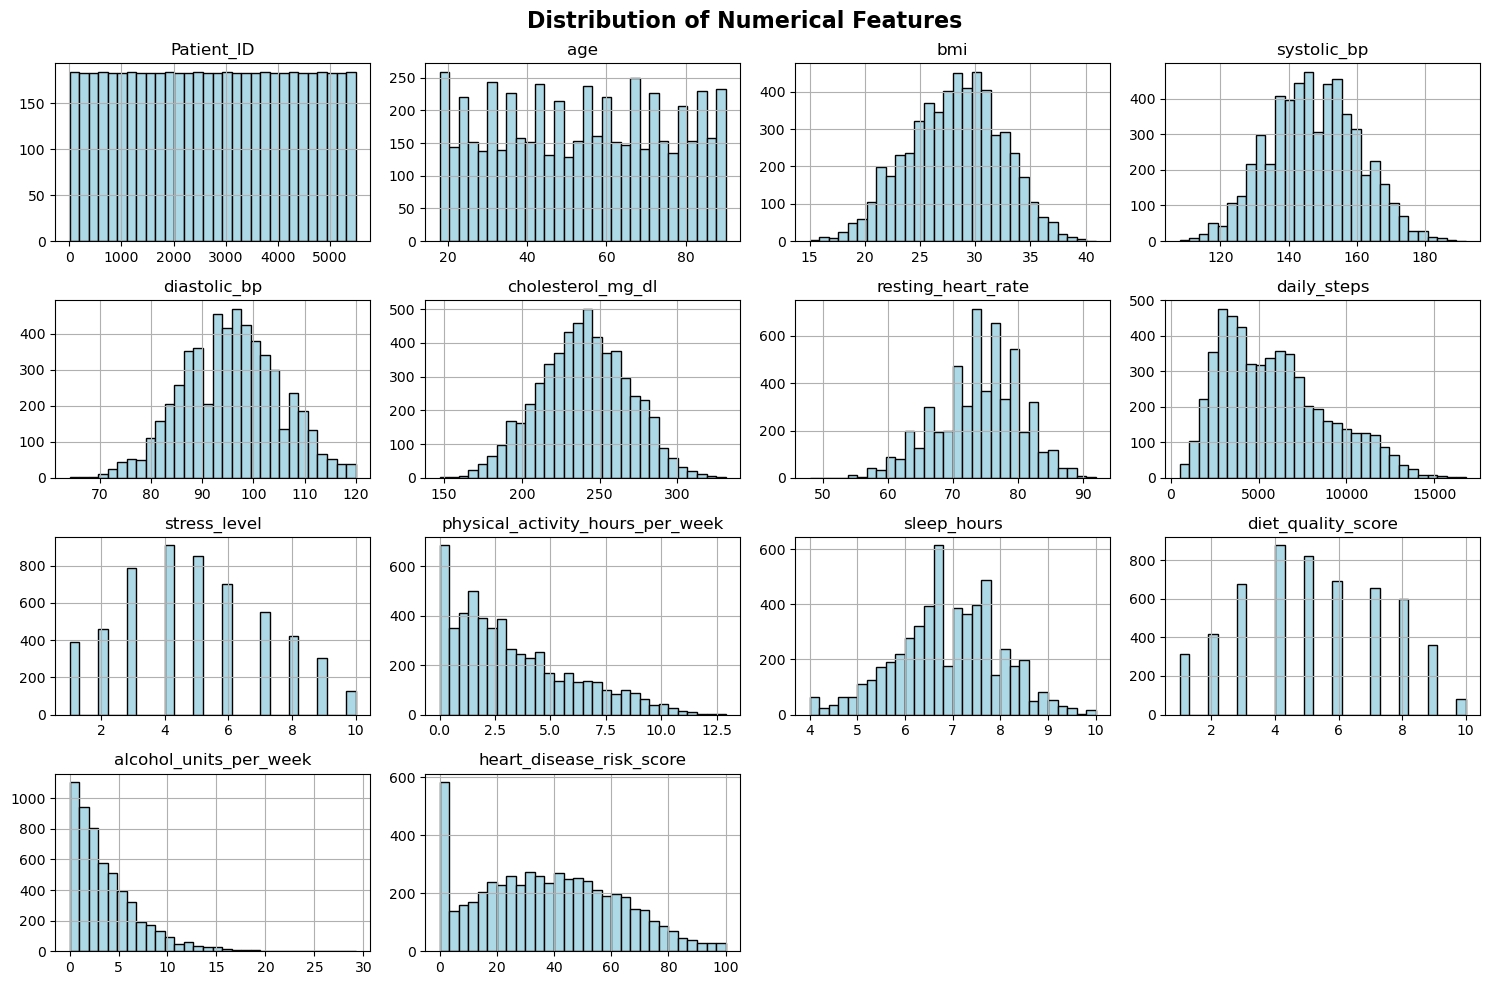

In [8]:
# Separate numerical and categorical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.tolist()

print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

# Distribution of numerical features (grid of histograms)
df[numerical_cols].hist(bins=30, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Findings**:  

The following features are well distributed (approximately normal):  
- BMI: Nice bell curve centered around 30, range ~15-40 
- Systolic BP: Normal distribution, centered ~145-150, range 110-190 
- Diastolic BP: Normal distribution, centered ~90-100, range 65-120 
- Cholesterol: Fairly normal, centered ~240, range 150-330 
- Resting Heart Rate: Fairly normal, centered ~75, range 50-95
- Sleep Hours: Normal distribution, centered ~7 hours
- Diet Quality Score: Relatively uniform

Features requiring transformation: 
- Daily Steps:  Right-skewed with peak at 3,000-5,000 steps, long tail extending to >15,000. Most people live relatively inactive lives. (log/sqrt transformation)
- Physical Activity Hours per Week: Heavily right-skewed with most observations at 0-2 hours, few outliers at 10+ hours. (log transformation)
- Alcohol Units per Week: Very heavily right-skewed with most observations at 0-5 units, long tail to ~30 units. (log transformation or binning)

Other notes:
- Age: Uniform distribution across range
- Patient_ID: Sequential identifier. Will be dropped before modeling.

## 1.3 Categorical Features Analysis

In [9]:
# Peek at categorical features
print(f"Number of categorical features: {len(categorical_cols)}")
print(f"Categorical columns: {categorical_cols}")

Number of categorical features: 3
Categorical columns: ['smoking_status', 'family_history_heart_disease', 'risk_category']


smoking_status
Never      3627
Current     994
Former      879
Name: count, dtype: int64


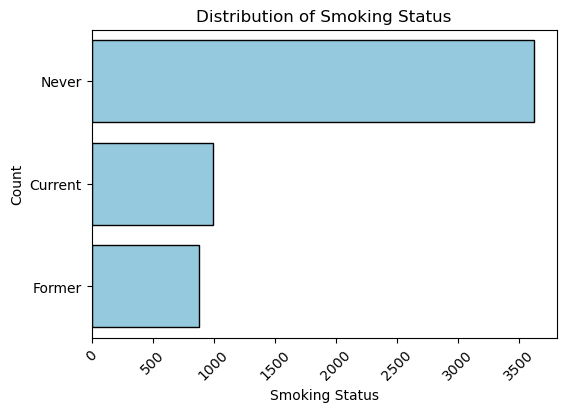

In [10]:
# Smoking status
print(df['smoking_status'].value_counts())

# Bar Chart Vusualization
plt.figure(figsize=(6,4))
sns.countplot(df['smoking_status'], color='skyblue', edgecolor='black')
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

family_history_heart_disease
No     4134
Yes    1366
Name: count, dtype: int64


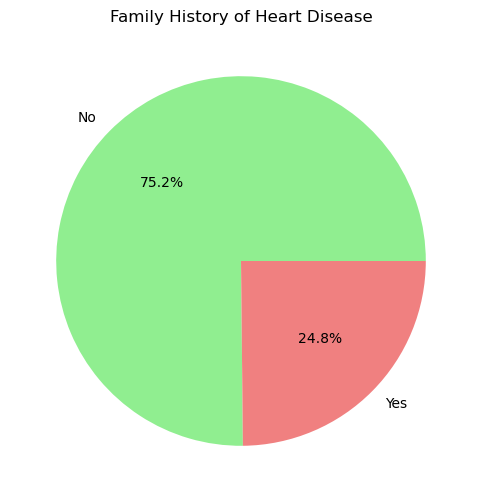

In [11]:
# Family history of heart disease
print(df['family_history_heart_disease'].value_counts())

# Pie Chart Visualization
plt.figure(figsize=(6,6))
plt.pie(df['family_history_heart_disease'].value_counts(), labels=df['family_history_heart_disease'].value_counts().index, autopct='%1.1f%%', colors=['lightgreen','lightcoral'])
plt.title('Family History of Heart Disease')
plt.show()

### 1.3.1 Relationship of Categorical values with Target variable

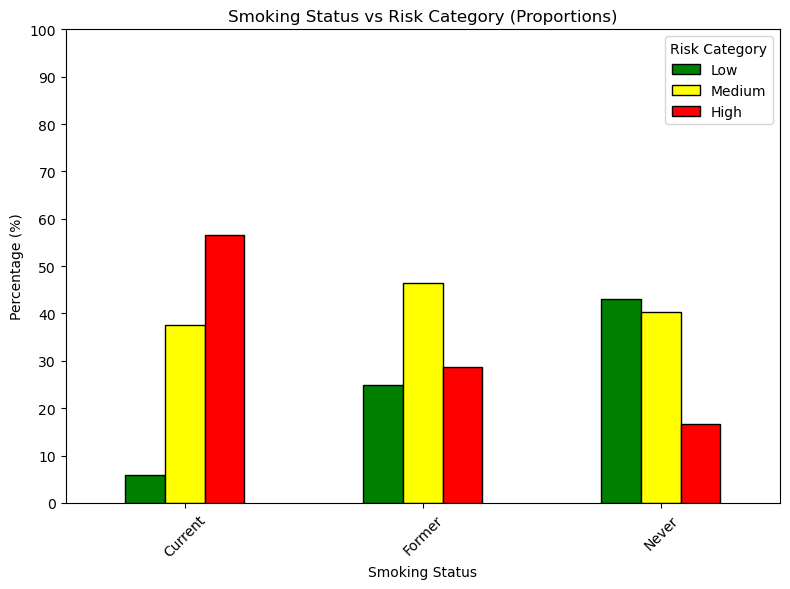


Risk Distribution by Smoking Status (%):
risk_category    Low  Medium  High
smoking_status                    
Current          5.9    37.5  56.5
Former          24.8    46.4  28.8
Never           43.0    40.3  16.6


In [12]:
# Smoking status vs Risk Category (proportions)
# Calculate proportions
smoking_risk_props = pd.crosstab(df['smoking_status'], df['risk_category'], normalize='index') * 100

# Plot
risk_order = ['Low', 'Medium', 'High']
smoking_risk_props = smoking_risk_props.reindex(columns=risk_order, fill_value=0)

risk_color_map = {'Low': 'green', 'Medium': 'yellow', 'High': 'red'}

ax = smoking_risk_props.plot(
    kind='bar',
    figsize=(8, 6),
    edgecolor='black',
    color=[risk_color_map[c] for c in smoking_risk_props.columns]  # guaranteed correct order
)

ax.set_title('Smoking Status vs Risk Category (Proportions)')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Percentage (%)')
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))
ax.tick_params(axis='x', rotation=45)

# Let pandas build the legend from the columns (avoids mismatches)
ax.legend(title='Risk Category')

plt.tight_layout()
plt.show()

print("\nRisk Distribution by Smoking Status (%):")
print(smoking_risk_props.round(1))

<Figure size 600x400 with 0 Axes>

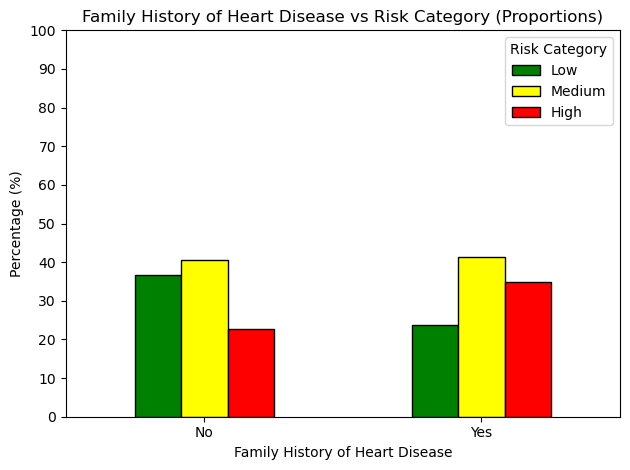


Risk Distribution by Family History of Heart Disease (%):
risk_category                  Low  Medium  High
family_history_heart_disease                    
No                            36.6    40.7  22.8
Yes                           23.9    41.2  34.9


In [13]:
# Family history of heart disease vs Risk Category (proportions)
family_history_risk_props = pd.crosstab(df['family_history_heart_disease'], df['risk_category'], normalize='index') * 100

# Reorder columns to: Low, Medium, High
family_history_risk_props = family_history_risk_props[['Low', 'Medium', 'High']]

# Plot
risk_colors = ['green', 'yellow', 'red']  # Now matches: Low, Medium, High
plt.figure(figsize=(6,4))
family_history_risk_props.plot(kind='bar', color=risk_colors, edgecolor='black')
plt.title('Family History of Heart Disease vs Risk Category (Proportions)')
plt.xlabel('Family History of Heart Disease')
plt.ylabel('Percentage (%)')
plt.legend(title='Risk Category', labels=['Low', 'Medium', 'High'])
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 101, 10))
plt.tight_layout()
plt.show()

# Print the actual percentages
print("\nRisk Distribution by Family History of Heart Disease (%):")
print(family_history_risk_props.round(1))

## 1.4 Correlation Analysis

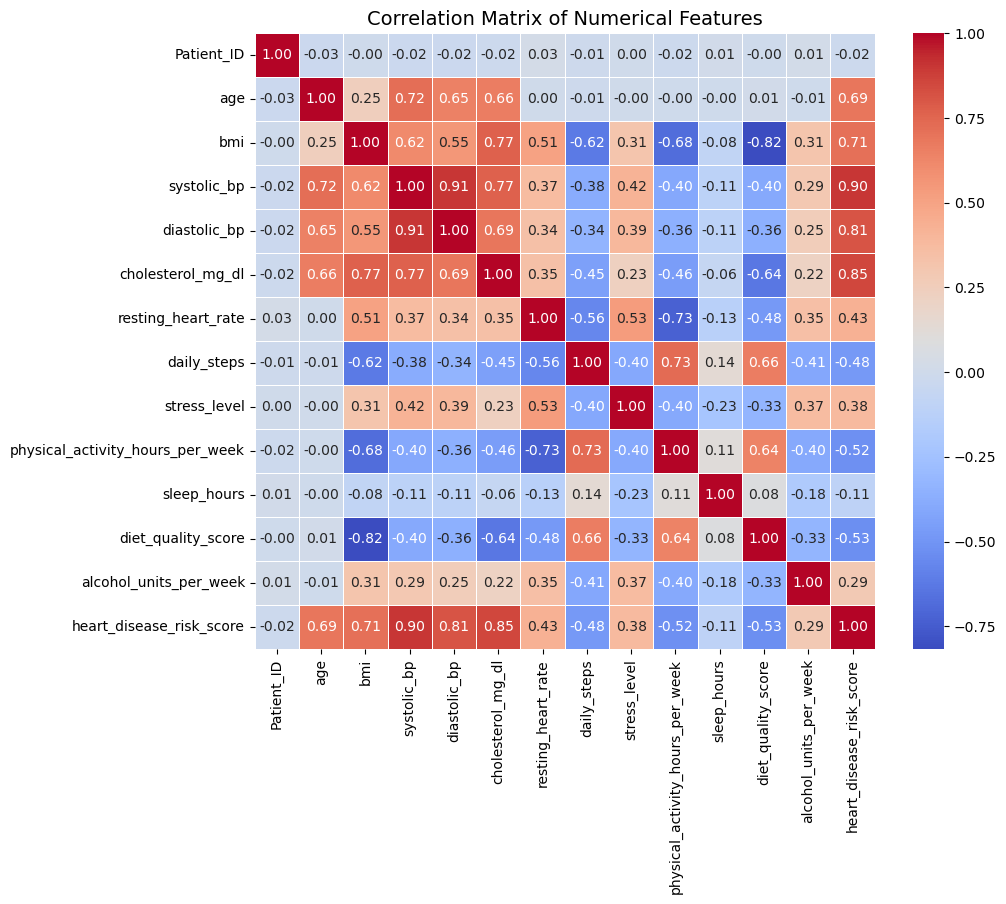

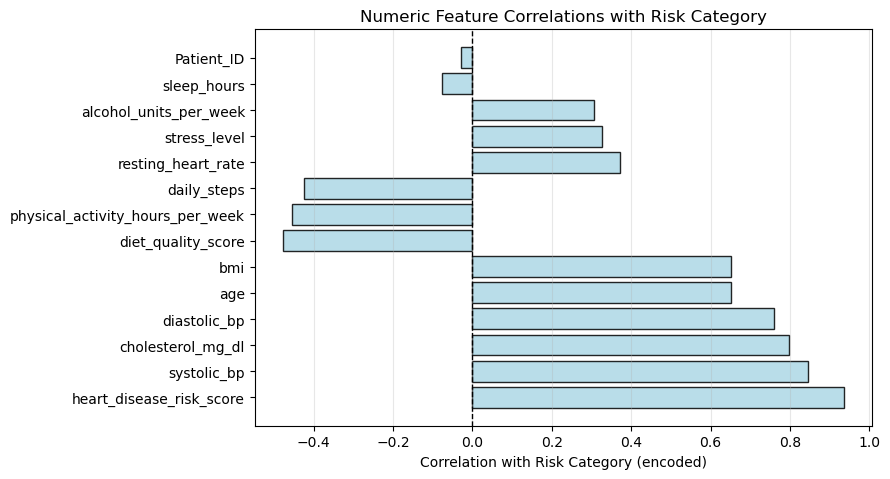

Top 5 features positively correlated with Risk Score: 
 -----------------------
heart_disease_risk_score    1.000000
systolic_bp                 0.901038
cholesterol_mg_dl           0.852483
diastolic_bp                0.813140
bmi                         0.713077
age                         0.694286
resting_heart_rate          0.428760
stress_level                0.377445
alcohol_units_per_week      0.289130
Patient_ID                 -0.021508
Name: heart_disease_risk_score, dtype: float64

Top 5 features negatively correlated with Risk Score: 
 -----------------------
bmi                                 0.713077
age                                 0.694286
resting_heart_rate                  0.428760
stress_level                        0.377445
alcohol_units_per_week              0.289130
Patient_ID                         -0.021508
sleep_hours                        -0.105379
daily_steps                        -0.478631
physical_activity_hours_per_week   -0.520258
diet_quality_scor

In [17]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.show()


# Encode risk category (ordinal)
risk_encoding = {'Low': 0, 'Medium': 1, 'High': 2}
df_corr = df.copy()
df_corr['risk_category_encoded'] = df_corr['risk_category'].map(risk_encoding)

# Numeric feature matrix
X_num = df_corr[numerical_cols]

# Correlation with risk category
corr_risk_category = X_num.corrwith(df_corr['risk_category_encoded'], method='spearman').dropna()

# Sort (by absolute correlation, so strongest relationships appear first)
corr_risk_category = corr_risk_category.reindex(corr_risk_category.abs().sort_values(ascending=False).index)

# Plot
y = np.arange(len(corr_risk_category))
fig, ax = plt.subplots(figsize=(9, max(4, 0.35 * len(corr_risk_category))))
ax.barh(y, corr_risk_category.values, color='lightblue', edgecolor='black', alpha=0.85)
ax.set_yticks(y)
ax.set_yticklabels(corr_risk_category.index)
ax.axvline(0, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Correlation with Risk Category (encoded)')
ax.set_title('Numeric Feature Correlations with Risk Category')
ax.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# Print top positive and negative correlations with target
correlations_risk_score = df[numerical_cols].corr()['heart_disease_risk_score'].sort_values(ascending=False)
print("Top 5 features positively correlated with Risk Score: \n -----------------------")
print(correlations_risk_score.head(10))
print("\nTop 5 features negatively correlated with Risk Score: \n -----------------------")
print(correlations_risk_score.tail(10))

## 1.5 Bivariate Analysis

## Multivariate Analysis?

## 1.6 Outlier Detection 

## 1.7 Key Insights & Hypotheses